In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import json
from geopy.geocoders import DataBC
from geopandas.tools import sjoin
import csv
from IPython.display import HTML, IFrame
from IPython.lib.pretty import pprint
from folium import plugins
from folium.plugins import MarkerCluster

%matplotlib inline
IFrame_width_px = 1024
IFrame_heigth_px = 600

In [2]:
#Import Sales Data

data=pd.read_csv("/home/mehmetali/Downloads/ProjectREV/csv/VancouverRE_SoldData.csv")

In [3]:
#Format Sales Data

data=data.drop_duplicates()
data.reset_index(inplace=True)
data['index']=data.index
data['Address'].describe()

count                             5072
unique                            5044
top       1208 HOMER STREET, Vancouver
freq                                 3
Name: Address, dtype: object

In [4]:
data.sample(2)

,index,Type,Type2,Price,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address
1520,1520,Apartment,"Corner Unit, End Unit","$765,000",26/05/2018,2,2,762,NaN,1 year,19,616,5598,"ORMIDALE STREET,",Vancouver,"616, 5598 ORMIDALE STREET, Vancouver"
2178,2178,Apartment,Ground Level Unit,"$1,020,000",25/05/2018,2,1,876,NaN,17,15,111,2655,"CRANBERRY DRIVE,",Vancouver,"111, 2655 CRANBERRY DRIVE, Vancouver"


In [5]:
#Transform Data for DataBC lat/long Data

geolocator=DataBC(timeout=5)

address, (latitude, longitude) = geolocator.geocode(data['Address'][2404])

print(address)

UNIT 302 -- 2220 Kingsway, Vancouver, BC


In [6]:
#Pull DataBC lat/long Data

#df=pd.DataFrame(['index','Address','latitude','longitude'])

#Get lat adn long for the addresses from DataBC

#for index, row in data.iterrows():
 #   location=geolocator.geocode(row['Address'])
  #  df=df.append({'index':row['index'],'Address':location.address,'latitude':location.latitude,'longitude':location.longitude}, ignore_index=True)
    
#df=df[['index','Address','latitude','longitude']]
    
#df.sample(2)

In [7]:
#lat/long Sanity Test

#df[['latitude', 'longitude']].mean()

In [8]:
#Plot Sales Data

#df.plot.scatter('longitude', 'latitude', s=11, figsize=(4,4))

In [9]:
#Clean Sales Data

#df=df[df['latitude'] < 49.3 ]
#df=df[df['latitude'] > 49.2 ]
#df=df[df['longitude'] < -123 ]

#df.plot.scatter('longitude', 'latitude', s=11, figsize=(4,4))

In [10]:
#Create "geometry" (POINT) Column

#from shapely.geometry import Point
#geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

#Coordinate reference system : WGS84

#crs = {'init': 'epsg:4326'}


#Creating a Geographic data frame 

#df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

#df.to_csv('/home/mehmetali/Downloads/ProjectREV/VancouverRE_SoldData_DataBC.csv')

df=pd.read_csv('/home/mehmetali/Downloads/ProjectREV/csv/VancouverRE_SoldData_DataBC.csv')

df.sample(2)

,Unnamed: 0,index,Address,latitude,longitude,geometry
932,936,932.0,"894 E 32nd Ave, Vancouver, BC",49.241440,-123.086215,POINT (-123.0862154 49.2414396)
2363,2373,2369.0,"UNIT 201 -- 2250 W 3rd Ave, Vancouver, BC",49.268811,-123.156366,POINT (-123.1563664 49.2688115)


In [11]:
df.describe()

,Unnamed: 0,index,latitude,longitude
count,4998.000000,4998.000000,4998.000000,4998.000000
mean,2517.851941,2513.851941,49.257347,-123.109562
std,1460.601009,1460.601009,0.022897,0.041586
min,4.000000,0.000000,49.203551,-123.224164
25%,1253.250000,1249.250000,49.240723,-123.133600
50%,2509.500000,2505.500000,49.263424,-123.114990
75%,3770.750000,3766.750000,49.275723,-123.086053
max,5075.000000,5071.000000,49.294099,-123.023025


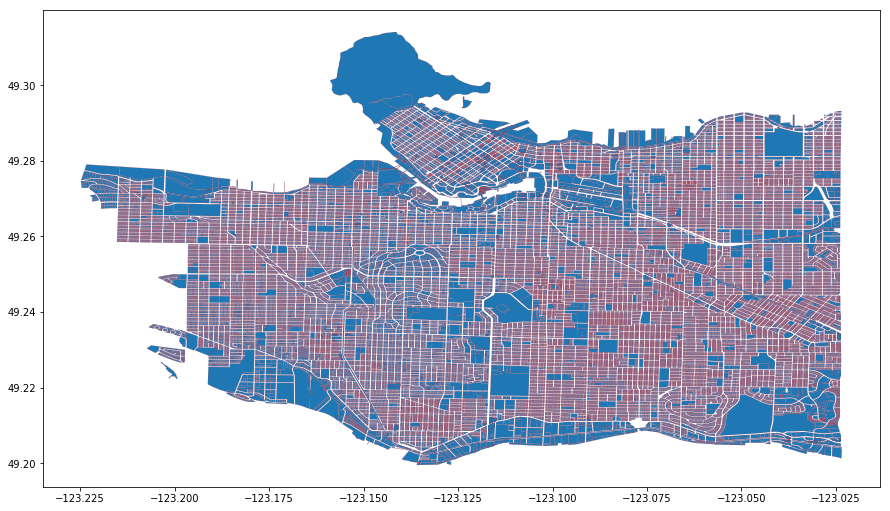

In [12]:
#Parcel Data for the Vancouver Region & Boundaries of Vancouver 

VanCityParsel=gpd.read_file('/home/mehmetali/Downloads/ProjectREV/geojson/PMBC_PARCEL_FABRIC_POLY_SVW.geojson')

VanCityBound=gpd.read_file('/home/mehmetali/Downloads/ProjectREV/geojson/VanCity.geojson')

VanCity = sjoin(VanCityParsel, VanCityBound, op='within')

VanCity.plot(figsize=(15,15), linewidth=0.1, edgecolor='red');

In [13]:
#Parcel Data for Vancouver

VanCityProp=df.merge(data, on='index', how='left')

VanCityProp = VanCityProp.rename(columns={'index':'prop_id','Address_x':'Address DataBC','Address_y':'Address SoldData'})

In [14]:
VanCityProp.sample(2)

,Unnamed: 0,prop_id,Address DataBC,latitude,longitude,geometry,Type,Type2,Price,Sold Date,...,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address SoldData
4483,4542,4538.0,"305 E 54th Ave, Vancouver, BC",49.221045,-123.099498,POINT (-123.0994981 49.2210451),Apartment,Inside Unit,"$498,000",21/04/2018,...,1,713,NaN,6,12,NaN,305,"E 54TH AVENUE,",Vancouver,"305 E 54TH AVENUE, Vancouver"
610,614,610.0,"3351 Quebec Pl, Vancouver, BC",49.255154,-123.104130,POINT (-123.1041305 49.2551543),House,2 Storey,"$950,000",02/06/2018,...,1,826,0.05,108,88,3351,QUEBEC,"PLACE,",Vancouver,"3351 QUEBEC PLACE, Vancouver"


In [15]:
VanCityProp.describe()

,Unnamed: 0,prop_id,latitude,longitude,Acres,DoM
count,4998.000000,4998.000000,4998.000000,4998.000000,1364.000000,4998.000000
mean,2517.851941,2513.851941,49.257347,-123.109562,0.143189,30.275910
std,1460.601009,1460.601009,0.022897,0.041586,0.329233,42.595304
min,4.000000,0.000000,49.203551,-123.224164,0.010000,0.000000
25%,1253.250000,1249.250000,49.240723,-123.133600,0.090000,7.000000
50%,2509.500000,2505.500000,49.263424,-123.114990,0.100000,15.000000
75%,3770.750000,3766.750000,49.275723,-123.086053,0.140000,38.000000
max,5075.000000,5071.000000,49.294099,-123.023025,9.000000,645.000000


In [16]:
list(VanCityProp)

['Unnamed: 0',
 'prop_id',
 'Address DataBC',
 'latitude',
 'longitude',
 'geometry',
 'Type',
 'Type2',
 'Price',
 'Sold Date',
 'Bedrooms',
 'Bathrooms',
 'Area',
 'Acres',
 'Age',
 'DoM',
 'Unit No',
 'Building No',
 'Street',
 'City',
 'Address SoldData']

In [17]:
VanCityProp= VanCityProp[[
    'prop_id',
    'Address DataBC',
    'latitude',
    'longitude',
    'geometry',
    'Type',
    'Type2',
    'Price',
    'Sold Date',
    'Bedrooms',
    'Bathrooms',
    'Area',
    'Acres',
    'Age',
    'DoM',
    'Unit No',
    'Building No',
    'Street',
    'City',
    'Address SoldData']]

In [18]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

crs = {'init': 'epsg:4326'}

VanCityProp = gpd.GeoDataFrame(VanCityProp, crs=crs, geometry=geometry)

In [19]:
unary_union = VanCityProp.unary_union

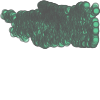

In [20]:
unary_union

In [21]:
VanCity= VanCity[['PARCEL_FABRIC_POLY_ID','PARCEL_NAME','PLAN_NUMBER','PIN','PID','PID_NUMBER','PARCEL_STATUS','PARCEL_CLASS','OWNER_TYPE','PARCEL_START_DATE','MUNICIPALITY','REGIONAL_DISTRICT','WHEN_UPDATED','FEATURE_AREA_SQM','FEATURE_LENGTH_M','OBJECTID','SE_ANNO_CAD_DATA','geometry']]

In [22]:
VanCity.sample(2)

,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,PARCEL_CLASS,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA,geometry
2557,1374587,011686022,VAP1705,NaN,011686022,11686022.0,Active,Subdivision,Private,20100203,"Vancouver, City of",Metro Vancouver Regional District,20190112,338.2718,87.1726,110390750,None,POLYGON ((-123.0354154769924 49.24671443345945...
101393,1438067,011190019,VAP5265,NaN,011190019,11190019.0,Active,Subdivision,Private,20050829,"Vancouver, City of",Metro Vancouver Regional District,20190112,638.7086,106.8161,110454230,None,POLYGON ((-123.1492912416425 49.21373298733695...


In [23]:
VanCityProp2 = sjoin(VanCityProp, VanCity, how='left')

In [24]:
print(VanCityProp2['geometry'][0])

POINT (-123.1980102 49.2292154)


In [25]:
VanCityProp2.describe()

,prop_id,latitude,longitude,Acres,DoM,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,6371.000000,6371.000000,6371.000000,1364.000000,6371.000000,4936.000000,4.936000e+03,9.000000e+00,2.281000e+03,4936.000000,4936.000000,4.936000e+03
mean,2649.517815,49.256759,-123.107382,0.143189,30.398368,59925.752634,1.442298e+06,1.825083e+07,1.798373e+07,3777.492734,230.268110,1.104585e+08
std,1459.887962,0.024787,0.040200,0.329233,40.834769,26231.915514,6.575540e+04,8.934539e+06,8.831557e+06,4546.699010,139.055806,6.575540e+04
min,0.000000,49.203551,-123.224164,0.010000,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,34.450100,38.687100,1.090310e+08
25%,1383.500000,49.238448,-123.128315,0.090000,7.000000,40913.000000,1.425861e+06,1.239535e+07,1.108224e+07,635.470625,110.579425,1.104420e+08
50%,2684.000000,49.264188,-123.114015,0.100000,16.000000,60088.000000,1.447468e+06,1.985518e+07,1.441502e+07,2219.473450,195.037100,1.104636e+08
75%,3899.500000,49.277858,-123.088799,0.140000,38.000000,76896.000000,1.465256e+06,2.038378e+07,2.798662e+07,4661.458200,300.490100,1.104814e+08
max,5071.000000,49.294099,-123.023025,9.000000,645.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,42042.272500,1037.174400,1.106086e+08


In [26]:
VanCityProp2NaN=VanCityProp2[VanCityProp2['OBJECTID'].isnull()]

In [27]:
VanCityProp2NaN.describe()

,prop_id,latitude,longitude,Acres,DoM,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,1435.000000,1435.000000,1435.000000,50.00000,1435.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3095.758885,49.260682,-123.105743,0.21640,25.282927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1477.995288,0.022220,0.035242,0.35482,30.061596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,49.204315,-123.224164,0.01000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1934.500000,49.249203,-123.125660,0.09000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3490.000000,49.265829,-123.112900,0.14000,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4379.500000,49.278105,-123.094972,0.19500,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5070.000000,49.293220,-123.023025,2.30000,249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
VanCityProp2NotNaN=VanCityProp2[VanCityProp2['OBJECTID'].notnull()]

In [29]:
VanCityProp2NotNaN.describe()

,prop_id,latitude,longitude,Acres,DoM,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,4936.000000,4936.000000,4936.000000,1314.000000,4936.000000,4936.000000,4.936000e+03,9.000000e+00,2.281000e+03,4936.000000,4936.000000,4.936000e+03
mean,2519.786062,49.255618,-123.107858,0.140403,31.885535,59925.752634,1.442298e+06,1.825083e+07,1.798373e+07,3777.492734,230.268110,1.104585e+08
std,1428.814093,0.025373,0.041522,0.328042,43.358182,26231.915514,6.575540e+04,8.934539e+06,8.831557e+06,4546.699010,139.055806,6.575540e+04
min,0.000000,49.203551,-123.221179,0.020000,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,34.450100,38.687100,1.090310e+08
25%,1277.000000,49.235660,-123.129534,0.090000,7.000000,40913.000000,1.425861e+06,1.239535e+07,1.108224e+07,635.470625,110.579425,1.104420e+08
50%,2459.000000,49.263117,-123.115026,0.100000,17.000000,60088.000000,1.447468e+06,1.985518e+07,1.441502e+07,2219.473450,195.037100,1.104636e+08
75%,3703.250000,49.277767,-123.086195,0.140000,40.250000,76896.000000,1.465256e+06,2.038378e+07,2.798662e+07,4661.458200,300.490100,1.104814e+08
max,5071.000000,49.294099,-123.024168,9.000000,645.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,42042.272500,1037.174400,1.106086e+08


In [30]:
VanCityProp2NaN= VanCityProp2NaN[[
    'prop_id',
    'Address DataBC',
    'latitude',
    'longitude',
    'geometry',
    'Type',
    'Type2',
    'Price',
    'Sold Date',
    'Bedrooms',
    'Bathrooms',
    'Area',
    'Acres',
    'Age',
    'DoM',
    'Unit No',
    'Building No',
    'Street',
    'City',
    'Address SoldData']]

In [31]:
VanCityProp2NaN.sample(2)

,prop_id,Address DataBC,latitude,longitude,geometry,Type,Type2,Price,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address SoldData
4927,5001.0,"102 W 10th Ave, Vancouver, BC",49.262077,-123.106956,POINT (-123.1069558 49.2620773),Apartment,Ground Level Unit,"$689,000",24/04/2018,2,1,610,NaN,35,24,NaN,102,"W 10TH AVENUE,",Vancouver,"102 W 10TH AVENUE, Vancouver"
3632,3650.0,"UNIT 753 -- 955 E Hastings St, Vancouver, BC",49.281067,-123.083291,POINT (-123.0832907 49.2810673),Apartment,5 Plus Level,"$670,000",08/10/2018,2,2,760,NaN,New,12,753,955,"E HASTINGS STREET,",Vancouver,"753, 955 E HASTINGS STREET, Vancouver"


In [32]:
#Find NaN cells (after sjoin) with nearest_point

In [33]:
pts3 =VanCity.unary_union

In [34]:
VanCityProp2NaN2=pd.DataFrame

In [35]:
VanCityProp2NaN2=pd.DataFrame(columns=['prop_id', 'prop point'])

In [36]:
from shapely.ops import nearest_points
for i, row in VanCityProp2NaN.iterrows():
    VanCityProp2NaN2=VanCityProp2NaN2.append({'prop_id':row['prop_id'],'prop point':row['geometry'],'geometry':nearest_points(row.geometry, pts3)[1]}, ignore_index=True)

In [37]:
VanCityProp2NaN2=VanCityProp2NaN2[['prop_id','geometry']]
VanCityProp2NaN2.sample(2)

,prop_id,geometry
654,3183.0,POINT (-123.1267822131109 49.28790202462197)
1020,4309.0,POINT (-123.1276622063912 49.27193656111785)


In [38]:
VanCityProp2NaN2 = gpd.GeoDataFrame(VanCityProp2NaN2, crs=crs, geometry='geometry')


In [39]:
VanCityProp2NaN3 = sjoin(VanCityProp2NaN2, VanCity, how='left')

In [40]:
VanCityProp2NaN3NaN=VanCityProp2NaN3[VanCityProp2NaN3['OBJECTID'].isnull()]

In [41]:
VanCityProp2NaN3NotNaN=VanCityProp2NaN3[VanCityProp2NaN3['OBJECTID'].notnull()]

In [42]:
VanCityProp2NaN3NotNaN.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,964.000000,964.000000,9.640000e+02,6.000000e+00,4.930000e+02,964.000000,964.000000,9.640000e+02
mean,3307.585062,56898.521784,1.420380e+06,1.344033e+07,1.518894e+07,5563.117210,253.525714,1.104365e+08
std,1411.062421,23807.724740,1.558958e+05,8.602629e+05,7.856771e+06,23618.126696,238.819016,1.558958e+05
min,1.000000,3061.000000,1.950300e+04,1.186715e+07,2.512602e+06,23.517300,33.574300,1.090357e+08
25%,2281.250000,40776.000000,1.411494e+06,1.356386e+07,8.740992e+06,580.686425,106.633100,1.104277e+08
50%,3747.500000,60063.500000,1.430162e+06,1.356386e+07,1.422556e+07,2564.873500,218.438300,1.104463e+08
75%,4471.250000,73203.000000,1.461489e+06,1.356386e+07,1.803895e+07,5633.916000,346.649275,1.104777e+08
max,5070.000000,110290.000000,1.590838e+06,1.451937e+07,3.071218e+07,493917.209900,3997.926900,1.106070e+08


In [43]:
VanCityProp2NaN3NaN.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,600.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2857.851667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1492.563401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1652.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3024.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5062.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
list(VanCityProp2NaN3NaN)

['prop_id',
 'geometry',
 'index_right',
 'PARCEL_FABRIC_POLY_ID',
 'PARCEL_NAME',
 'PLAN_NUMBER',
 'PIN',
 'PID',
 'PID_NUMBER',
 'PARCEL_STATUS',
 'PARCEL_CLASS',
 'OWNER_TYPE',
 'PARCEL_START_DATE',
 'MUNICIPALITY',
 'REGIONAL_DISTRICT',
 'WHEN_UPDATED',
 'FEATURE_AREA_SQM',
 'FEATURE_LENGTH_M',
 'OBJECTID',
 'SE_ANNO_CAD_DATA']

In [45]:
VanCityProp2NaN3NaN.sample(2)

,prop_id,geometry,index_right,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,PARCEL_CLASS,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA
1242,4664.0,POINT (-123.0993163249783 49.26822170514586),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1159,4519.0,POINT (-123.0994153556847 49.28200879109854),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
VanCity2=VanCity

In [47]:
VanCity2['centroid']=VanCity.centroid

In [48]:
list(VanCity2)

['PARCEL_FABRIC_POLY_ID',
 'PARCEL_NAME',
 'PLAN_NUMBER',
 'PIN',
 'PID',
 'PID_NUMBER',
 'PARCEL_STATUS',
 'PARCEL_CLASS',
 'OWNER_TYPE',
 'PARCEL_START_DATE',
 'MUNICIPALITY',
 'REGIONAL_DISTRICT',
 'WHEN_UPDATED',
 'FEATURE_AREA_SQM',
 'FEATURE_LENGTH_M',
 'OBJECTID',
 'SE_ANNO_CAD_DATA',
 'geometry',
 'centroid']

In [49]:
VanCity2=VanCity2[['PARCEL_FABRIC_POLY_ID',
                   'PARCEL_NAME',
                   'PLAN_NUMBER',
                   'PIN',
                   'PID',
                   'PID_NUMBER',
                   'PARCEL_STATUS',
                   'PARCEL_CLASS',
                   'OWNER_TYPE',
                   'PARCEL_START_DATE',
                   'MUNICIPALITY',
                   'REGIONAL_DISTRICT',
                   'WHEN_UPDATED',
                   'FEATURE_AREA_SQM',
                   'FEATURE_LENGTH_M',
                   'OBJECTID',
                   'SE_ANNO_CAD_DATA',
                   'centroid']]

In [50]:
VanCity2 = VanCity2.rename(columns={'centroid':'geometry'})

In [51]:
VanCity2 = gpd.GeoDataFrame(VanCity2, crs=crs, geometry='geometry')


In [52]:
pts4 =VanCity2.unary_union

In [53]:
VanCityProp2NaN3NaN2=pd.DataFrame

VanCityProp2NaN3NaN2=pd.DataFrame(columns=['prop_id', 'prop point'])

In [54]:
from shapely.ops import nearest_points
for i, row in VanCityProp2NaN3NaN.iterrows():
    VanCityProp2NaN3NaN2=VanCityProp2NaN3NaN2.append({'prop_id':row['prop_id'],'prop point':row['geometry'],'geometry':nearest_points(row.geometry, pts4)[1]}, ignore_index=True)

In [55]:
VanCityProp2NaN3NaN2=VanCityProp2NaN3NaN2[['prop_id','geometry']]

In [56]:
VanCityProp2NaN3NaN2 = gpd.GeoDataFrame(VanCityProp2NaN3NaN2, crs=crs, geometry='geometry')

In [57]:
VanCityProp2NaN3NaN3 = sjoin(VanCityProp2NaN3NaN2, VanCity, how='left')

In [58]:
VanCityProp2NaN3NaN3.sample(2)

,prop_id,geometry,index_right,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,...,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA,centroid
365,3658.0,POINT (-123.1156652878235 49.27581875977952),60157,1430014,Building Strata,BCS1437,NaN,None,NaN,Active,...,Unknown,None,"Vancouver, City of",Metro Vancouver Regional District,20170626,7781.5929,352.7477,110446177,None,POINT (-123.1156652878235 49.27581875977952)
304,3063.0,POINT (-123.1320571249741 49.28676072618581),94539,1433915,015773485,VAP92,NaN,015773485,15773485.0,Active,...,Municipal,20150102,"Vancouver, City of",Metro Vancouver Regional District,20190112,402.1976,80.2198,110450078,None,POINT (-123.1320571249741 49.28676072618581)


In [59]:
VanCityProp2NaN3NaN3NotNaN=VanCityProp2NaN3NaN3[VanCityProp2NaN3NaN3['OBJECTID'].notnull()]

In [60]:
VanCityProp2NaN3NaN3NaN=VanCityProp2NaN3NaN3[VanCityProp2NaN3NaN3['OBJECTID'].isnull()]

In [61]:
VanCityProp2NaN3NaN3NaN.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
VanCityProp2NotNaN = VanCityProp2NotNaN[['prop_id',
                                         'geometry',
                                         'index_right',
                                         'PARCEL_FABRIC_POLY_ID',
                                         'PARCEL_NAME',
                                         'PLAN_NUMBER',
                                         'PIN',
                                         'PID',
                                         'PID_NUMBER',
                                         'PARCEL_STATUS',
                                         'PARCEL_CLASS',
                                         'OWNER_TYPE',
                                         'PARCEL_START_DATE',
                                         'MUNICIPALITY',
                                         'REGIONAL_DISTRICT',
                                         'WHEN_UPDATED',
                                         'FEATURE_AREA_SQM',
                                         'FEATURE_LENGTH_M',
                                         'OBJECTID',
                                         'SE_ANNO_CAD_DATA']]

In [63]:
df_new = pd.concat([VanCityProp2NotNaN, VanCityProp2NaN3NotNaN])

In [64]:
df_new.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,5900.000000,5900.000000,5.900000e+03,1.500000e+01,2.774000e+03,5900.000000,5900.000000,5.900000e+03
mean,2648.504407,59431.133898,1.438717e+06,1.632663e+07,1.748704e+07,4069.245615,234.068166,1.104549e+08
std,1455.260814,25873.668642,8.746638e+04,7.199282e+06,8.730628e+06,10430.363313,159.879066,8.746638e+04
min,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,23.517300,33.574300,1.090310e+08
25%,1382.750000,40913.000000,1.425661e+06,1.297961e+07,1.088012e+07,622.306100,110.043575,1.104418e+08
50%,2687.000000,60087.000000,1.441611e+06,1.356386e+07,1.439380e+07,2229.318400,195.096400,1.104578e+08
75%,3877.500000,76624.000000,1.465241e+06,2.011491e+07,2.796229e+07,4942.804300,310.384300,1.104814e+08
max,5071.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,493917.209900,3997.926900,1.106086e+08


In [65]:
VanCityProp2NaN3NaN3NotNaN=VanCityProp2NaN3NaN3NotNaN[['prop_id',
                                                       'geometry',
                                                       'index_right',
                                                       'PARCEL_FABRIC_POLY_ID',
                                                       'PARCEL_NAME',
                                                       'PLAN_NUMBER',
                                                       'PIN',
                                                       'PID',
                                                       'PID_NUMBER',
                                                       'PARCEL_STATUS',
                                                       'PARCEL_CLASS',
                                                       'OWNER_TYPE',
                                                       'PARCEL_START_DATE',
                                                       'MUNICIPALITY',
                                                       'REGIONAL_DISTRICT',
                                                       'WHEN_UPDATED',
                                                       'FEATURE_AREA_SQM',
                                                       'FEATURE_LENGTH_M',
                                                       'OBJECTID',
                                                       'SE_ANNO_CAD_DATA']]

In [66]:
df_new2 = pd.concat([df_new, VanCityProp2NaN3NaN3NotNaN])

In [67]:
df_new2.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,6701.000000,6701.000000,6.701000e+03,1.600000e+01,3.193000e+03,6701.000000,6701.000000,6.701000e+03
mean,2692.264289,58908.661245,1.440054e+06,1.604792e+07,1.744054e+07,3947.557545,231.734586,1.104562e+08
std,1457.601262,25763.758872,8.370710e+04,7.043949e+06,8.810431e+06,9867.498798,159.151078,8.370710e+04
min,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,2.003000,6.831100,1.090310e+08
25%,1439.000000,40911.000000,1.425652e+06,1.226333e+07,1.085582e+07,583.480500,108.664200,1.104418e+08
50%,2729.000000,60063.000000,1.440491e+06,1.356386e+07,1.451042e+07,2204.973400,195.037100,1.104567e+08
75%,3962.000000,75950.000000,1.465248e+06,1.998505e+07,2.798658e+07,4942.804300,310.384300,1.104814e+08
max,5071.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,493917.209900,3997.926900,1.106086e+08


In [68]:
df_new2.sample(2)

,prop_id,geometry,index_right,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,PARCEL_CLASS,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA
2989,3004.0,POINT (-123.1313224 49.2754356),73013.0,1460846.0,Building Strata,BCS2495,NaN,None,NaN,Active,Building Strata,Unknown,None,"Vancouver, City of",Metro Vancouver Regional District,20170626,3025.1754,236.9941,110477009.0,None
3879,3898.0,POINT (-123.0903151 49.2115265),57433.0,1478891.0,030263476,EPP73971,NaN,030263476,30263476.0,Active,Subdivision,Private,20170927,"Vancouver, City of",Metro Vancouver Regional District,20190112,7109.4753,339.8249,110495054.0,None


In [69]:
df_new3=df_new2

In [70]:
df_new3=df_new3[['prop_id','OBJECTID']]

In [71]:
df_new3.sample(2)

,prop_id,OBJECTID
4363,4410.0,110443706.0
849,849.0,110418146.0


In [72]:
df_new3.describe()

,prop_id,OBJECTID
count,6701.000000,6.701000e+03
mean,2692.264289,1.104562e+08
std,1457.601262,8.370710e+04
min,0.000000,1.090310e+08
25%,1439.000000,1.104418e+08
50%,2729.000000,1.104567e+08
75%,3962.000000,1.104814e+08
max,5071.000000,1.106086e+08


In [73]:
df.sample(2)

,Unnamed: 0,index,Address,latitude,longitude,geometry
2700,2713,2709.0,"UNIT 215 -- 1777 W 7th Ave, Vancouver, BC",49.265854,-123.145007,POINT (-123.1450075 49.2658545)
1970,1975,1971.0,"UNIT 415 -- 3228 Tupper St, Vancouver, BC",49.256443,-123.115574,POINT (-123.1155744 49.2564427)


In [74]:
df_new4=df_new3.merge(df, left_on='prop_id' , right_on='index', how='left')

In [75]:
df_new4.sample(2)

,prop_id,OBJECTID,Unnamed: 0,index,Address,latitude,longitude,geometry
5257,2892.0,110477903.0,2896,2892.0,"1602 Alberni St, Vancouver, BC",49.290172,-123.131354,POINT (-123.1313537 49.290172)
5884,5031.0,110443749.0,5035,5031.0,"UNIT 1002 -- 58 Keefer Pl, Vancouver, BC",49.279569,-123.107002,POINT (-123.1070024 49.2795686)


In [76]:
df_new4.describe()

,prop_id,OBJECTID,Unnamed: 0,index,latitude,longitude
count,6701.000000,6.701000e+03,6701.000000,6701.000000,6701.000000,6701.000000
mean,2692.264289,1.104562e+08,2696.264289,2692.264289,49.256293,-123.107003
std,1457.601262,8.370710e+04,1457.601262,1457.601262,0.025270,0.039871
min,0.000000,1.090310e+08,4.000000,0.000000,49.203551,-123.224164
25%,1439.000000,1.104418e+08,1443.000000,1439.000000,49.237136,-123.127784
50%,2729.000000,1.104567e+08,2733.000000,2729.000000,49.264160,-123.114080
75%,3962.000000,1.104814e+08,3966.000000,3962.000000,49.277895,-123.088722
max,5071.000000,1.106086e+08,5075.000000,5071.000000,49.294099,-123.023025


In [77]:
#df_new5=df_new4.groupby('prop_id').mean()

In [78]:
df_new5=df_new4.drop_duplicates(['prop_id'], keep='last')

In [79]:
df_new5.describe()

,prop_id,OBJECTID,Unnamed: 0,index,latitude,longitude
count,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000
mean,2513.851941,1.104440e+08,2517.851941,2513.851941,49.257347,-123.109562
std,1460.601009,9.150605e+04,1460.601009,1460.601009,0.022897,0.041586
min,0.000000,1.090310e+08,4.000000,0.000000,49.203551,-123.224164
25%,1249.250000,1.104306e+08,1253.250000,1249.250000,49.240723,-123.133600
50%,2505.500000,1.104452e+08,2509.500000,2505.500000,49.263424,-123.114990
75%,3766.750000,1.104768e+08,3770.750000,3766.750000,49.275723,-123.086053
max,5071.000000,1.106086e+08,5075.000000,5071.000000,49.294099,-123.023025


In [80]:
df_new5.sample(2)

,prop_id,OBJECTID,Unnamed: 0,index,Address,latitude,longitude,geometry
5640,4409.0,110525076.0,4413,4409.0,"UNIT 25 -- 388 W 64th Ave, Vancouver, BC",49.213053,-123.113709,POINT (-123.1137086 49.2130534)
6329,3472.0,110476626.0,3476,3472.0,"UNIT 301 -- 1067 Marinaside Cres, Vancouver, BC",49.273423,-123.117200,POINT (-123.1172003 49.2734235)


In [81]:
df_new6=df_new5

In [82]:
df_new6=df_new6[['prop_id','OBJECTID']]

In [83]:
df_new6.sample(2)

,prop_id,OBJECTID
90,126.0,110437241.0
1358,1395.0,110434343.0


In [84]:
df_new7=df_new6.merge(data, left_on='prop_id' , right_on='index', how='left')

In [85]:
df_new7.sample(2)

,prop_id,OBJECTID,index,Type,Type2,Price,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address
3970,3735.0,110481394.0,3735,Apartment,Upper Unit,"$675,000",18/09/2018,1,1,551,NaN,11,5,2106,909,"MAINLAND STREET,",Vancouver,"2106, 909 MAINLAND STREET, Vancouver"
2281,2863.0,110481471.0,2863,Apartment,"1 Storey, Corner Unit","$985,000",30/09/2018,2,2,898,NaN,4,56,813,1618,"QUEBEC STREET,",Vancouver,"813, 1618 QUEBEC STREET, Vancouver"


In [86]:
df_new7=pd.read_csv("/home/mehmetali/Downloads/ProjectREV/csv/df_new7.csv")

In [87]:
df_new7.sample(2)

,Unnamed: 0,prop_id,OBJECTID,index,Type,Type2,Price,ppsqft,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address
2923,2923,3714,110444228,3714,Apartment,Corner Unit,"685,000",1142,16/05/2018,1,1,600,NaN,18,9,703,928,"RICHARDS STREET,",Vancouver,"703, 928 RICHARDS STREET, Vancouver"
148,148,195,110464321,195,House,2 Storey w/Bsmt.,"3,900,000",771,05/04/2019,5,4,"5,058",0.18,29,25,2971,W 44TH,"AVENUE,",Vancouver,"2971 W 44TH AVENUE, Vancouver"


In [88]:
df_new8=df_new7

In [89]:
df_new8=df_new8[['OBJECTID','Type','ppsqft','Building No','Street']]

In [90]:
prop=df_new7

In [91]:
prop=prop[['OBJECTID','ppsqft']]

In [92]:
prop.sample(2)

,OBJECTID,ppsqft
2168,110444992,999
370,110458362,1277


In [93]:
prop=prop.groupby('OBJECTID').mean()

In [94]:
prop.sample(2)

,ppsqft
OBJECTID,
110401573,800.0
110477289,922.0


In [95]:
prop.describe()

,ppsqft
count,2968.000000
mean,922.096855
std,369.009597
min,94.000000
25%,723.000000
50%,888.250000
75%,1057.000000
max,11667.000000


In [96]:
prop['ppsqft'].quantile(0.3)

760.0

In [97]:
from branca.colormap import linear

# OrRd colormap is kind of similar to tabelog score colors

colormap = linear.YlOrRd_09.scale(
    prop['ppsqft'].quantile(0.3),
    prop['ppsqft'].quantile(0.95))

colormap

In [98]:
#Apply colors on 'id's

colors = prop['ppsqft'].apply(colormap)

colors.sample(5)

OBJECTID
110443264    #feb54f
110476762    #ffe793
110425889    #ffffcc
110458440    #f03322
110557409    #f03322
Name: ppsqft, dtype: object

In [99]:
colorsDF=pd.DataFrame({'OBJECTID':colors.index, 'colors':colors.values})

In [100]:
colorsDF.sample(2)

,OBJECTID,colors
553,110406526,#ffffcc
272,110390037,#ffffcc


In [101]:
VanCity.sample(2)

,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,PARCEL_CLASS,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA,geometry,centroid
50033,1402042,011652756,VAP4269,NaN,011652756,11652756.0,Active,Subdivision,Private,20010202,"Vancouver, City of",Metro Vancouver Regional District,20190112,367.6426,93.2771,110418205,None,POLYGON ((-123.1064484070061 49.22956685224248...,POINT (-123.1061959085423 49.22960378209149)
8713,1409036,011704535,VAP367,NaN,011704535,11704535.0,Active,Subdivision,Private,20150611,"Vancouver, City of",Metro Vancouver Regional District,20190112,444.8450,108.8794,110425199,None,POLYGON ((-123.0415257374262 49.27546838941551...,POINT (-123.0415912138233 49.27566831497663)


In [102]:
VanCity4=VanCity
VanCity4=VanCity4[['OBJECTID','geometry']]

In [103]:
colorsDF2=VanCity4.merge(colorsDF, on='OBJECTID' , how='left')

In [104]:
colorsDF2=colorsDF2[['OBJECTID','colors']]

In [105]:
colorsDF2.sample(2)

,OBJECTID,colors
12075,110394282,NaN
6110,110387442,NaN


In [106]:
colorsDF2=colorsDF2.fillna('#ffffff')

In [107]:
colorsDF2.set_index('OBJECTID', inplace=True)

colorsDF2.sample(2)

,colors
OBJECTID,
110412225,#ffffff
110404234,#ffffff


In [108]:
colorsDF3 = pd.Series(colorsDF2['colors'], index=colorsDF2.index)

In [109]:
grouped = colorsDF3.groupby(level=0)

In [110]:
colorsDF4=grouped.first()

In [111]:
colorsDF4.loc[110479082]

'#ffffff'

In [112]:
colorsDF4.sample(2)

OBJECTID
110396199    #ffffff
110443588    #fffbc1
Name: colors, dtype: object

In [113]:
colorsDF4.count()

101712

In [114]:
df_new8.sample(2)

,OBJECTID,Type,ppsqft,Building No,Street
1490,110441867,Apartment,735,3660,"VANNESS AVENUE,"
268,110456526,House,1150,W 26TH,"AVENUE,"


In [115]:
VanCity4.count()

OBJECTID    101712
geometry    101712
dtype: int64

In [116]:
VanCity5=pd.merge(VanCity4,df_new8, on='OBJECTID', how='left')

VanCity5=VanCity5.drop_duplicates(['OBJECTID'], keep='last')

In [117]:
VanCity5.count()

OBJECTID       101712
geometry       101712
Type             2968
ppsqft           2968
Building No      2968
Street           2957
dtype: int64

In [118]:
VanCity5.set_index('OBJECTID', inplace=True)

In [119]:
VanCity5.sample(2)

,geometry,Type,ppsqft,Building No,Street
OBJECTID,,,,,
110475865,POLYGON ((-123.1215231883144 49.23567225769072...,NaN,NaN,NaN,NaN
110421038,POLYGON ((-123.0598847705351 49.28227722434752...,NaN,NaN,NaN,NaN


In [120]:
yaletownco=(49.2763217, -123.1209558)

In [121]:
n = folium.Map(location=yaletownco, #tiles='Stamen Toner',
               zoom_start=16)

folium.GeoJson(
    VanCity5.to_json(),
    style_function=lambda feature: {
        'fillColor': colorsDF4.loc[int(feature['id'])], #my_color_function(feature), #colorsDF3.loc[feature['id']],
        'color': 'black',
        'weight': 0, #parseldeki çizgiler
        #'dashArray': '1, 1',
        'fillOpacity': 0.8
        #'highlight': True
    },
    tooltip=folium.features.GeoJsonTooltip(
            fields=['Type','ppsqft'],
            aliases=['Type:','Price per sqft:'],
        localize=True
    )
).add_to(n)

marker_cluster = MarkerCluster().add_to(n)

In [122]:
# Create clustered points on top of the map
for idx, row in VanCityProp.iterrows():
    # Get lat and lon of points
    lon = row['geometry'].x
    lat = row['geometry'].y

    # Get address informatin
    address = row['Address DataBC']

    # Add marker to the marker cluster
    folium.Marker(location=[lat, lon], icon=None, popup=address).add_to(marker_cluster)

#folium.LayerControl().add_to(n)
n.add_child(colormap)
n.save('/home/mehmetali/Downloads/ProjectREV/html/Vancouver.html')
#folium.LayerControl().add_to(m)

In [123]:
IFrame(src='http://localhost:8888/notebooks/Downloads/ProjectREV/html/Vancouver.html', width=IFrame_width_px, height=IFrame_heigth_px)